# RFM 

**Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings #avoid warnings 
warnings.filterwarnings('ignore')

## Read Data

In [13]:
data = pd.read_csv('sales.csv', sep=",", encoding='Latin-1',
                  parse_dates=['ORDERDATE'] )

In [14]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [11]:
#see dmesion
data.shape

(2823, 25)

#### General INFO

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

#### Check null Values

In [22]:
round(data.isnull().mean()*100, 2)

ORDERNUMBER          0.00
QUANTITYORDERED      0.00
PRICEEACH            0.00
ORDERLINENUMBER      0.00
SALES                0.00
ORDERDATE            0.00
STATUS               0.00
QTR_ID               0.00
MONTH_ID             0.00
YEAR_ID              0.00
PRODUCTLINE          0.00
MSRP                 0.00
PRODUCTCODE          0.00
CUSTOMERNAME         0.00
PHONE                0.00
ADDRESSLINE1         0.00
ADDRESSLINE2        89.30
CITY                 0.00
STATE               52.64
POSTALCODE           2.69
COUNTRY              0.00
TERRITORY           38.04
CONTACTLASTNAME      0.00
CONTACTFIRSTNAME     0.00
DEALSIZE             0.00
dtype: float64

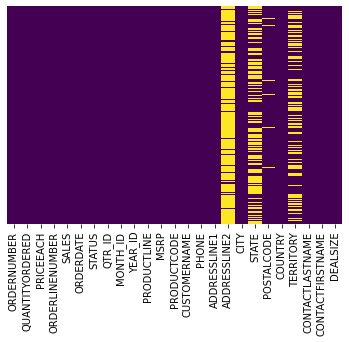

In [19]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False);

## EDA

In [30]:
c = data.groupby('COUNTRY', as_index = False)['SALES'].sum()\
.sort_values(by= 'SALES', ascending =False)
c

,COUNTRY,SALES
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


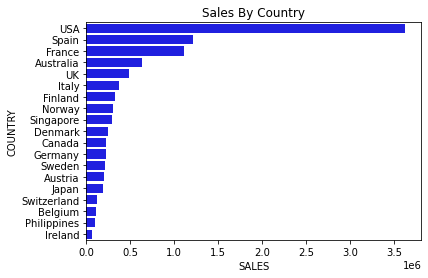

In [35]:
sns.barplot(y = c.COUNTRY, x = c.SALES, color = 'blue')
plt.title('Sales By Country')
plt.show()

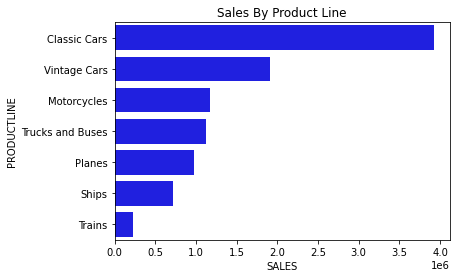

In [38]:
c = data.groupby('PRODUCTLINE', as_index = False)['SALES'].sum()\
.sort_values(by= 'SALES', ascending =False)

sns.barplot(x = c.SALES, y = c.PRODUCTLINE, color = 'blue')
plt.title('Sales By Product Line')
plt.show()

In [45]:
data.groupby('year', as_index = False)['SALES'].sum()

,year,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


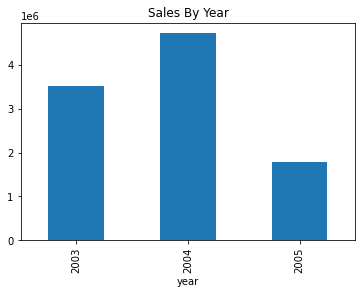

In [48]:
data.groupby('year')['SALES'].sum().plot(kind ='bar')
plt.title('Sales By Year')
plt.show()

In [58]:
df.columns

Index(['ORDERNUMBER', 'ORDERDATE', 'SALES'], dtype='object')

In [59]:
df.head()

,ORDERNUMBER,ORDERDATE,SALES
0,10107,2003-02-24,2871.00
1,10121,2003-05-07,2765.90
2,10134,2003-07-01,3884.34
3,10145,2003-08-25,3746.70
4,10159,2003-10-10,5205.27


## Recency

In [60]:
df.columns

Index(['ORDERNUMBER', 'ORDERDATE', 'SALES'], dtype='object')

In [78]:
# Group by order
df_recency = data.groupby('ORDERNUMBER', as_index =False)['ORDERDATE'].max()

#Change name of columns
df_recency.columns = ['order', 'last_purchase_date']

#create series with max date of df_recency last purchase
recent_date = df_recency['last_purchase_date'].max()

#Create a new columns calculte rencency last_purchase_date  - recent date

df_recency['rencecy'] = df_recency['last_purchase_date'].apply(lambda x:(recent_date -x).days)
df_recency.head()

,order,last_purchase_date,rencecy
0,10100,2003-01-06,876
1,10101,2003-01-09,873
2,10102,2003-01-10,872
3,10103,2003-01-29,853
4,10104,2003-01-31,851


### Frequency

In [80]:
df_frecuency = data.groupby('ORDERNUMBER', as_index =False)['ORDERDATE'].count()
df_frecuency.head(2)

,ORDERNUMBER,ORDERDATE
0,10100,4
1,10101,4


In [81]:
#Change name of columns
df_frecuency.columns=['order', 'frecuency']
df_frecuency.head()

,order,frecuency
0,10100,4
1,10101,4
2,10102,2
3,10103,16
4,10104,13


### Monetary Value

In [82]:
df_monetary = data.groupby('ORDERNUMBER', as_index =False)['SALES'].sum()
df_monetary.columns = ['order', 'monetary']
df_monetary.head()

,order,monetary
0,10100,12133.25
1,10101,11432.34
2,10102,6864.05
3,10103,54702.00
4,10104,44621.96


### Merging all columns

In [87]:
rfm = df_recency.merge(df_frecuency, on='order')
rfm = rfm.merge(df_monetary, on='order')
rfm = rfm.drop('last_purchase_date', axis =1)
rfm.head()

,order,rencecy,frecuency,monetary
0,10100,876,4,12133.25
1,10101,873,4,11432.34
2,10102,872,2,6864.05
3,10103,853,16,54702.00
4,10104,851,13,44621.96


In [89]:
rfm.columns

Index(['order', 'rencecy', 'frecuency', 'monetary'], dtype='object')

In [92]:
rfm['r_rank'] = rfm['rencecy'].rank(ascending =False)
rfm['f_rank'] = rfm['frecuency'].rank(ascending =False)
rfm['m_rank'] = rfm['monetary'].rank(ascending =False)

In [94]:
rfm['r_rank_norm'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_norm'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_norm'] = (rfm['m_rank']/rfm['m_rank'].max())*100

In [95]:
rfm.head(2)

,order,rencecy,frecuency,monetary,r_rank,f_rank,m_rank,r_rank_norm,f_rank_norm,m_rank_norm
0,10100,876,4,12133.25,1.0,248.0,259.0,0.326264,82.804674,84.364821
1,10101,873,4,11432.34,2.0,248.0,262.0,0.652529,82.804674,85.342020


In [97]:
rfm.drop(['r_rank', 'f_rank', 'm_rank'], axis =1, inplace =True)

In [98]:
rfm.head()

,order,rencecy,frecuency,monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,10100,876,4,12133.25,0.326264,82.804674,84.364821
1,10101,873,4,11432.34,0.652529,82.804674,85.342020
2,10102,872,2,6864.05,0.978793,93.823038,91.530945
3,10103,853,16,54702.00,1.305057,11.352254,11.726384
4,10104,851,13,44621.96,1.631321,29.883139,28.338762


### Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : $0.15*Recency$ $score + 0.28*Frequency$ $score + 0.57 *Monetary score$

In [99]:
rfm['rfm_score'] = 0.15 * rfm['r_rank_norm'] + 0.28 * rfm['f_rank_norm'] +0.57 * rfm['m_rank_norm']

In [100]:
rfm['rfm_score'] *=0.5

In [103]:
rfm['rfm_score'] = rfm['rfm_score'].round(2)

In [105]:
df_rfm = rfm[['order','rfm_score' ]]
df_rfm

,order,rfm_score
0,10100,35.66
1,10101,35.96
2,10102,39.29
3,10103,5.03
4,10104,12.38
...,...,...
302,10421,46.44
303,10422,46.86
304,10423,43.48
305,10424,30.57


#### Rating Customer based upon the RFM score

In [108]:
df_rfm['bins_lables'] = pd.cut(df_rfm['rfm_score'], bins= 5, labels= ['Lost Customer', 
                                              'Low-value customer',
                                            'Medium value customer',
                                            'High Value Customer',
                                             'Top Customer'])

df_rfm.head()

,order,rfm_score,bins_lables
0,10100,35.66,High Value Customer
1,10101,35.96,High Value Customer
2,10102,39.29,High Value Customer
3,10103,5.03,Lost Customer
4,10104,12.38,Low-value customer


#### Method 2:

- rfm score >4.5 : Top Customer  
- 4.5 > rfm score > 4 : High Value Customer  
- 4>rfm score >3 : Medium value customer  
- 3>rfm score>1.6 : Low-value customer  
- rfm score<1.6 :Lost Customer  

In [141]:
df_rfm['rfm_score'].describe()

count    307.000000
mean      25.263355
std       12.511011
min        1.990000
25%       14.240000
50%       26.190000
75%       35.705000
max       49.630000
Name: rfm_score, dtype: float64

In [149]:
df_rfm.head()

,order,rfm_score,bins_lables,np_lables
0,10100,35.66,High Value Customer,High Value Customer
1,10101,35.96,High Value Customer,High Value Customer
2,10102,39.29,High Value Customer,Top Customer
3,10103,5.03,Lost Customer,Lost Customer
4,10104,12.38,Low-value customer,Lost Customer


### SEGMENT

In [152]:
#make cluster

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [154]:
model = KMeans()
vis = KElbowVisualizer(model, k=(4,12))

In [166]:
X = rfm['rfm_score']
X = np.array(X)
X = X.reshape(-1,1)

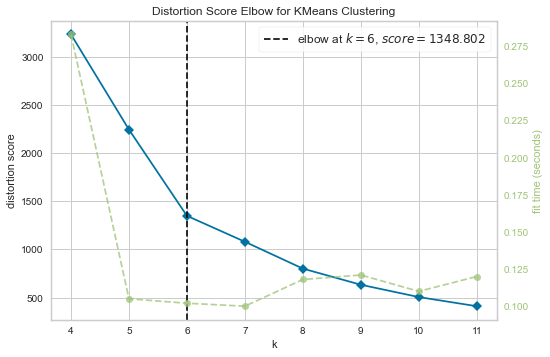

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
vis.fit(X)
vis.show()

### Method 4:

In [213]:
rfm['rencecy_class'] =  pd.cut(rfm['rencecy'], bins =5,labels=[5,4,3,2,1])
rfm['frecuency_class'] =  pd.cut(rfm['frecuency'], bins =5,labels=[1,2,3,4,5])
rfm['monetary_class'] =  pd.cut(rfm['monetary'], bins =5,labels=[1,2,3,4,5])

In [214]:
rfm.head()

,order,rencecy,frecuency,monetary,r_rank_norm,f_rank_norm,m_rank_norm,rfm_score,cluster,rencecy_class,frecuency_class,monetary_class
0,10100,876,4,12133.25,0.326264,82.804674,84.364821,35.66,0,1,1,1
1,10101,873,4,11432.34,0.652529,82.804674,85.342020,35.96,0,1,1,1
2,10102,872,2,6864.05,0.978793,93.823038,91.530945,39.29,2,1,1,1
3,10103,853,16,54702.00,1.305057,11.352254,11.726384,5.03,4,1,5,4
4,10104,851,13,44621.96,1.631321,29.883139,28.338762,12.38,1,1,4,3


In [215]:
rfm.columns

Index(['order', 'rencecy', 'frecuency', 'monetary', 'r_rank_norm',
       'f_rank_norm', 'm_rank_norm', 'rfm_score', 'cluster', 'rencecy_class',
       'frecuency_class', 'monetary_class'],
      dtype='object')

In [216]:
df = rfm[['order', 'rencecy', 'frecuency', 'monetary',
         'rencecy_class','frecuency_class', 'monetary_class']]

In [217]:
df.head()

,order,rencecy,frecuency,monetary,rencecy_class,frecuency_class,monetary_class
0,10100,876,4,12133.25,1,1,1
1,10101,873,4,11432.34,1,1,1
2,10102,872,2,6864.05,1,1,1
3,10103,853,16,54702.00,1,5,4
4,10104,851,13,44621.96,1,4,3


In [218]:
df['rfm'] = df['rencecy_class'].astype(int) + df['frecuency_class'].astype(int) + df['monetary_class'].astype(int)


In [219]:
df['rfm_str'] = df['rencecy_class'].astype(str) + df['frecuency_class'].astype(str) + df['monetary_class'].astype(str)

In [220]:
df.head()

,order,rencecy,frecuency,monetary,rencecy_class,frecuency_class,monetary_class,rfm,rfm_str
0,10100,876,4,12133.25,1,1,1,3,111
1,10101,873,4,11432.34,1,1,1,3,111
2,10102,872,2,6864.05,1,1,1,3,111
3,10103,853,16,54702.00,1,5,4,10,154
4,10104,851,13,44621.96,1,4,3,8,143


In [221]:
df.tail()

,order,rencecy,frecuency,monetary,rencecy_class,frecuency_class,monetary_class,rfm,rfm_str
302,10421,2,2,7261.75,5,1,1,7,511
303,10422,1,2,6166.80,5,1,1,7,511
304,10423,1,5,8411.95,5,2,1,8,521
305,10424,0,6,35133.34,5,2,3,10,523
306,10425,0,13,43784.69,5,4,3,12,543


In [224]:
df.query('rfm_str =="543"')

,order,rencecy,frecuency,monetary,rencecy_class,frecuency_class,monetary_class,rfm,rfm_str
247,10361,165,14,37905.15,5,4,3,12,543
253,10367,139,13,44273.36,5,4,3,12,543
257,10371,128,12,36124.27,5,4,3,12,543
266,10380,104,13,38360.40,5,4,3,12,543
269,10383,98,13,41249.74,5,4,3,12,543
285,10401,58,12,46519.00,5,4,3,12,543
298,10416,21,14,41509.94,5,4,3,12,543
301,10420,2,13,43971.43,5,4,3,12,543
306,10425,0,13,43784.69,5,4,3,12,543


In [225]:
df.query('rfm >=10')

,order,rencecy,frecuency,monetary,rencecy_class,frecuency_class,monetary_class,rfm,rfm_str
3,10103,853,16,54702.00,1,5,4,10,154
5,10105,840,15,58871.11,1,5,4,10,154
6,10106,834,18,56181.32,1,5,4,10,154
8,10108,820,16,55245.02,1,5,4,10,154
10,10110,805,16,51017.92,1,5,4,10,154
...,...,...,...,...,...,...,...,...,...
299,10417,18,6,31821.90,5,2,3,10,523
300,10419,14,14,59475.10,5,4,4,13,544
301,10420,2,13,43971.43,5,4,3,12,543
305,10424,0,6,35133.34,5,2,3,10,523
